In [39]:
# Analysis of Fatal Police Shootings in the United States

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [40]:
# Data Loading

# Load the original raw data
df_raw = pd.read_csv('fatal-police-shootings-data.csv')

# Create a copy for preprocessing
df = df_raw.copy()
print("Initial data info:")
df.info()

Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6068 non-null   int64  
 1   name                     5850 non-null   object 
 2   date                     6068 non-null   object 
 3   manner_of_death          6068 non-null   object 
 4   armed                    5860 non-null   object 
 5   age                      5802 non-null   float64
 6   gender                   6067 non-null   object 
 7   race                     5479 non-null   object 
 8   city                     6068 non-null   object 
 9   state                    6068 non-null   object 
 10  signs_of_mental_illness  6068 non-null   bool   
 11  threat_level             6068 non-null   object 
 12  flee                     5726 non-null   object 
 13  body_camera              6068 non-null   bool   
 14  longi

In [41]:
# Data Preprocessing

# Handling Null Values

df['name'] = df['name'].fillna('Unknown')
df['armed'] = df['armed'].fillna('Unknown')
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)
mode_race = df['race'].mode()[0]
df['race'] = df['race'].fillna(mode_race)
mode_flee = df['flee'].mode()[0]
df['flee'] = df['flee'].fillna(mode_flee)
df.dropna(subset=['longitude', 'latitude'], inplace=True)

In [42]:
# Data Type Conversion

df['date'] = pd.to_datetime(df['date'], format='mixed')
df['age'] = df['age'].astype(int)

In [43]:
# Handling Outliers in 'age'

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [44]:
# Verifying Cleaned Data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5717 entries, 0 to 6067
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5717 non-null   int64         
 1   name                     5717 non-null   object        
 2   date                     5717 non-null   datetime64[ns]
 3   manner_of_death          5717 non-null   object        
 4   armed                    5717 non-null   object        
 5   age                      5717 non-null   int64         
 6   gender                   5717 non-null   object        
 7   race                     5717 non-null   object        
 8   city                     5717 non-null   object        
 9   state                    5717 non-null   object        
 10  signs_of_mental_illness  5717 non-null   bool          
 11  threat_level             5717 non-null   object        
 12  flee                     5717 non-null 

\n--- States with the Highest Shootings ---
Top 15 states with the most shootings:
state
CA    867
TX    516
FL    387
AZ    261
CO    212
GA    194
WA    169
OK    167
NC    164
OH    162
TN    144
MO    138
LA    115
NM    114
PA    113
Name: count, dtype: int64


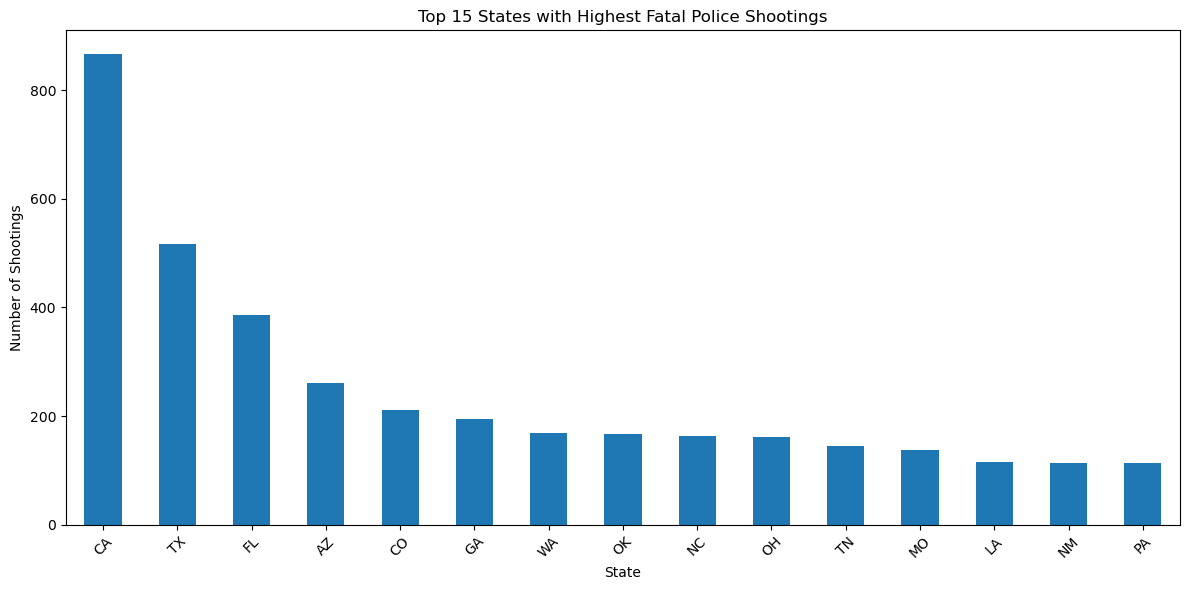

In [45]:
# Analysis and Visualization on Cleaned Data

# States with the Highest Shootings
print("\\n--- States with the Highest Shootings ---")
state_counts = df['state'].value_counts()
top_states = state_counts.head(15)
print("Top 15 states with the most shootings:")
print(top_states)

plt.figure(figsize=(12, 6))
top_states.plot(kind='bar')
plt.title('Top 15 States with Highest Fatal Police Shootings')
plt.xlabel('State')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('state_wise_shootings.png')
plt.show()

Number of people shot while unarmed: 377
race
W    163
B    130
H     67
A      8
O      5
N      4
Name: count, dtype: int64


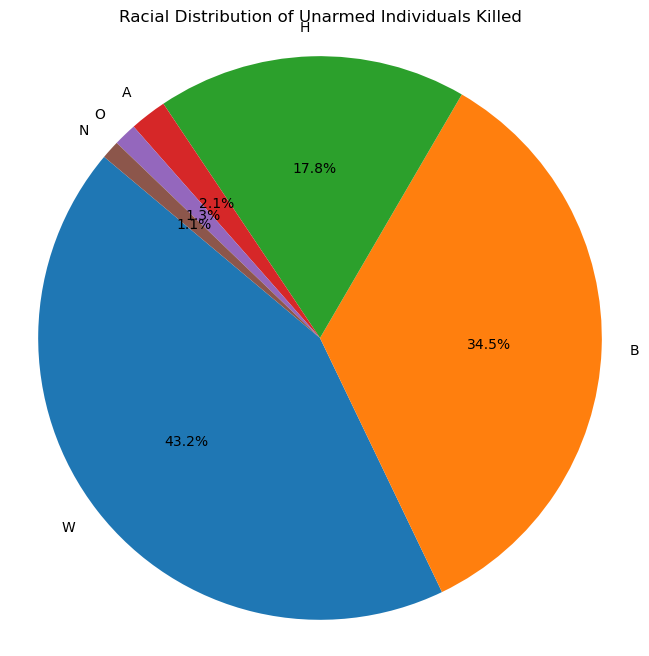

gender
M    351
F     26
Name: count, dtype: int64


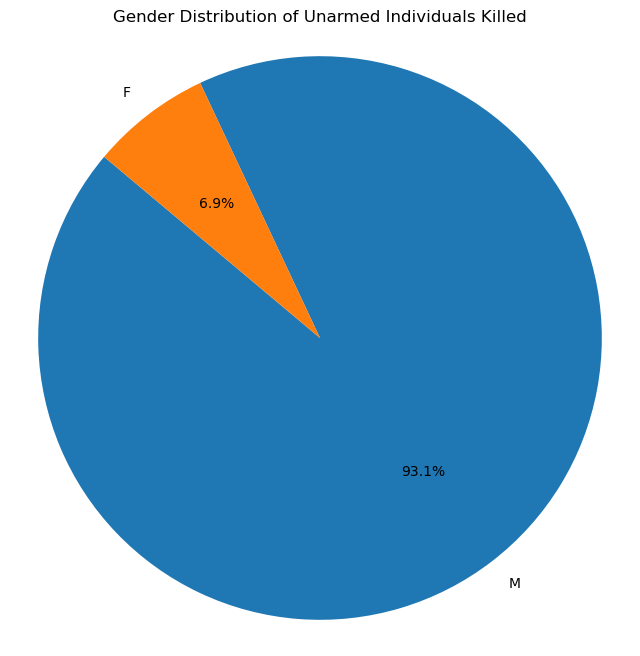

In [46]:
# Unarmed Shootings Analysis

unarmed_df = df[df['armed'] == 'unarmed']
unarmed_count = unarmed_df.shape[0]
print(f"Number of people shot while unarmed: {unarmed_count}")

race_counts_unarmed = unarmed_df['race'].value_counts()
gender_counts_unarmed = unarmed_df['gender'].value_counts()

print(race_counts_unarmed)
plt.figure(figsize=(8, 8))
plt.pie(race_counts_unarmed, labels=race_counts_unarmed.index, autopct='%1.1f%%', startangle=140)
plt.title('Racial Distribution of Unarmed Individuals Killed')
plt.axis('equal')
plt.savefig('unarmed_race_pie_chart.png')
plt.show()

print(gender_counts_unarmed)
plt.figure(figsize=(8, 8))
plt.pie(gender_counts_unarmed, labels=gender_counts_unarmed.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Unarmed Individuals Killed')
plt.axis('equal')
plt.savefig('unarmed_gender_pie_chart.png')
plt.show()

Year-wise counts:
year
2015    985
2016    921
2017    942
2018    911
2019    934
2020    901
2021    123
Name: count, dtype: int64


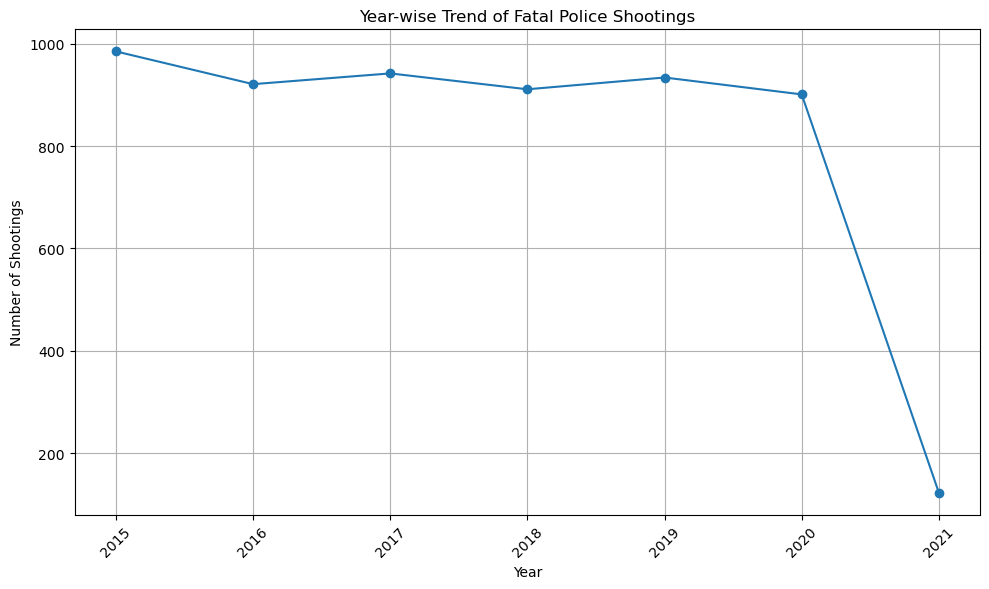

In [47]:
# Year-wise Distribution

df['year'] = df['date'].dt.year
year_counts = df['year'].value_counts().sort_index()
print("Year-wise counts:")
print(year_counts)

plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Year-wise Trend of Fatal Police Shootings')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.grid(True)
plt.xticks(year_counts.index, rotation=45)
plt.tight_layout()
plt.savefig('year_wise_trend.png')
plt.show()

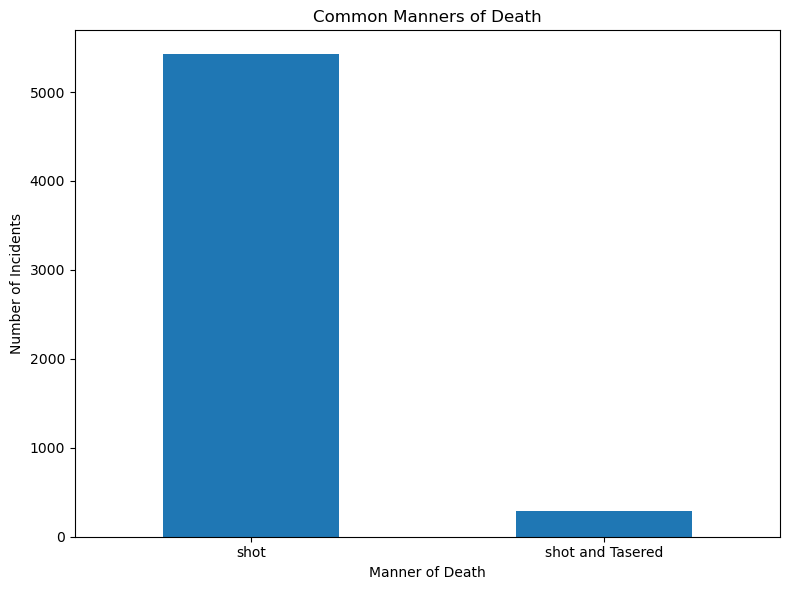

In [48]:
# Manner of Death


manner_of_death_counts = df['manner_of_death'].value_counts()

plt.figure(figsize=(8, 6))
manner_of_death_counts.plot(kind='bar')
plt.title('Common Manners of Death')
plt.xlabel('Manner of Death')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('manner_of_death.png')
plt.show()

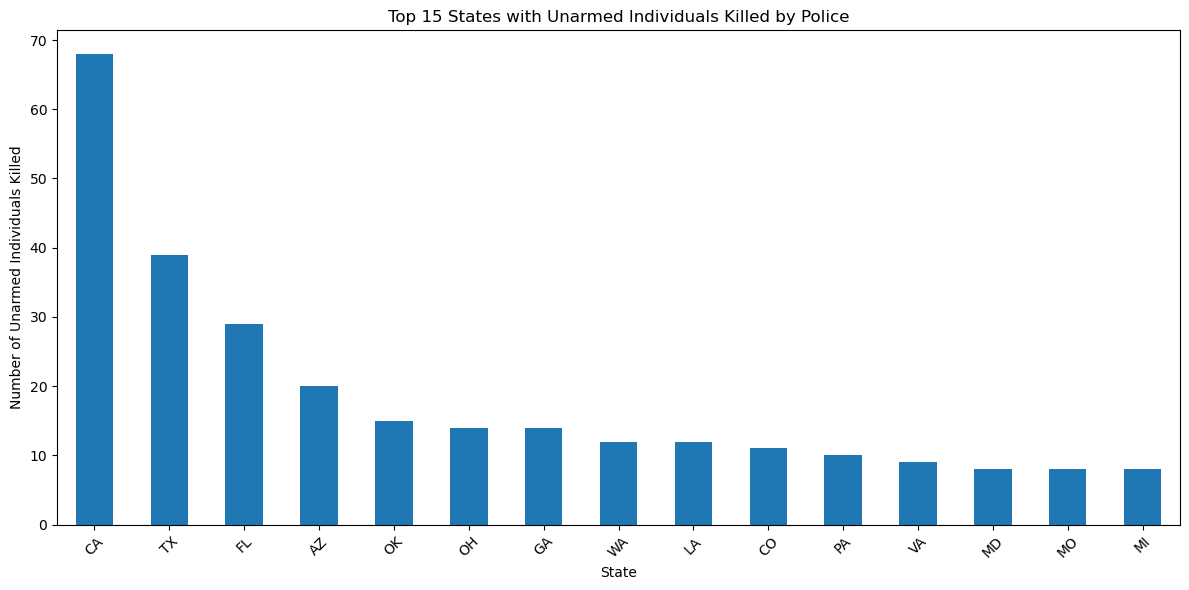

In [49]:
# State-wise Distribution of Unarmed Killed

state_counts_unarmed = unarmed_df['state'].value_counts().head(15)

plt.figure(figsize=(12, 6))
state_counts_unarmed.plot(kind='bar')
plt.title('Top 15 States with Unarmed Individuals Killed by Police')
plt.xlabel('State')
plt.ylabel('Number of Unarmed Individuals Killed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('unarmed_statewise_distribution.png')
plt.show()

In [50]:
# Body Camera Analysis

no_body_camera_df = df[df['body_camera'] == False]
no_body_camera_count = no_body_camera_df.shape[0]
print(f"Number of people killed in the absence of a body camera: {no_body_camera_count}")

Number of people killed in the absence of a body camera: 4995


\nYear-wise comparison of total vs. no-camera shootings:
      Total Shootings  Shootings without Body Camera
year                                                
2015              985                            910
2016              921                            784
2017              942                            836
2018              911                            800
2019              934                            809
2020              901                            746
2021              123                            110


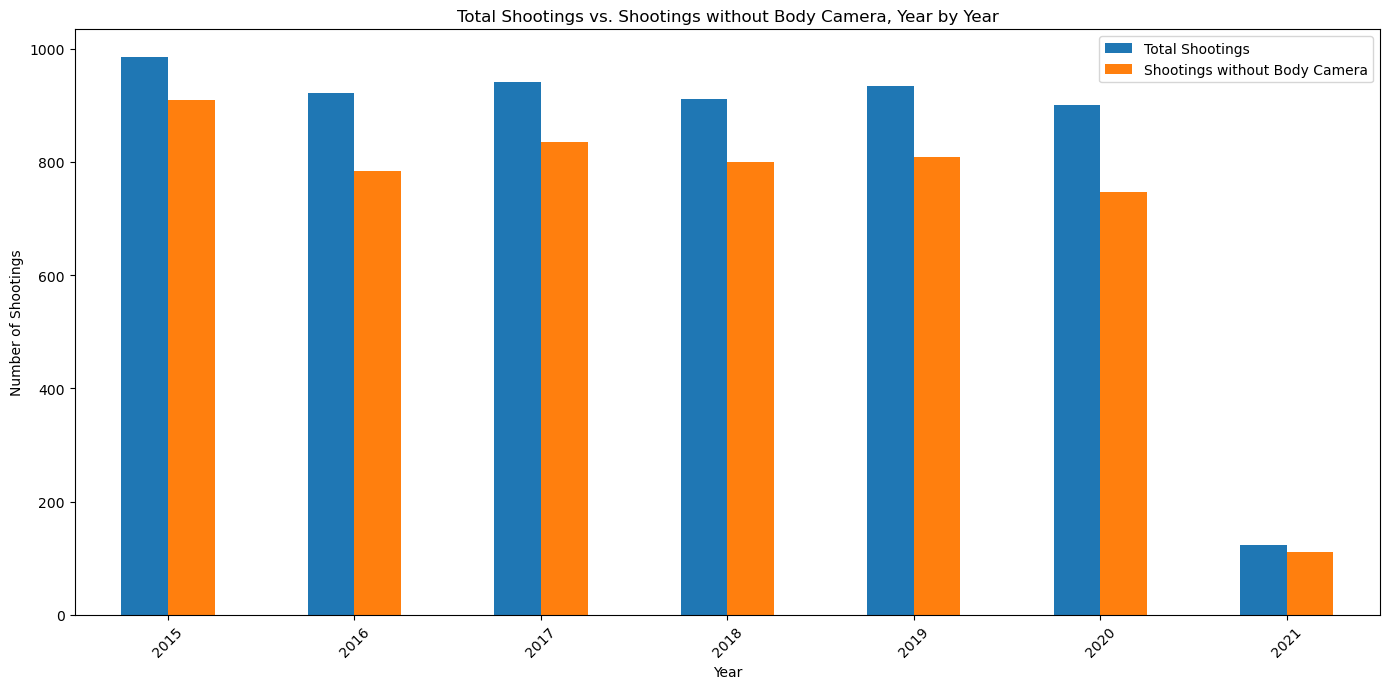

In [51]:
# Year-wise comparison
year_counts_no_camera = no_body_camera_df['year'].value_counts().sort_index()
comparison_df = pd.DataFrame({
    'Total Shootings': year_counts,
    'Shootings without Body Camera': year_counts_no_camera
})
print("\\nYear-wise comparison of total vs. no-camera shootings:")
print(comparison_df)

comparison_df.plot(kind='bar', figsize=(14, 7))
plt.title('Total Shootings vs. Shootings without Body Camera, Year by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_vs_no_camera_shootings_yearly.png')
plt.show()

Distribution of mentally ill individuals killed by age and race (from raw data):
race       A   B   H  N  O    W
age_group                      
0-18       0   2   4  0  0   12
19-30      9  74  59  4  4  177
31-40      5  81  66  8  3  221
41-50      8  38  25  2  2  157
51-60      3  11  19  1  1  153
61+        0  13   4  0  0   91


/var/folders/ml/9lq4ld051f5fszn2k_cpc6yh0000gn/T/ipykernel_2410/3479488178.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentally_ill_df_raw['age_group'] = pd.cut(mentally_ill_df_raw['age'], bins=bins, labels=labels, right=False)
/var/folders/ml/9lq4ld051f5fszn2k_cpc6yh0000gn/T/ipykernel_2410/3479488178.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_raw = mentally_ill_df_raw.groupby(['age_group', 'race']).size().unstack(fill_value=0)


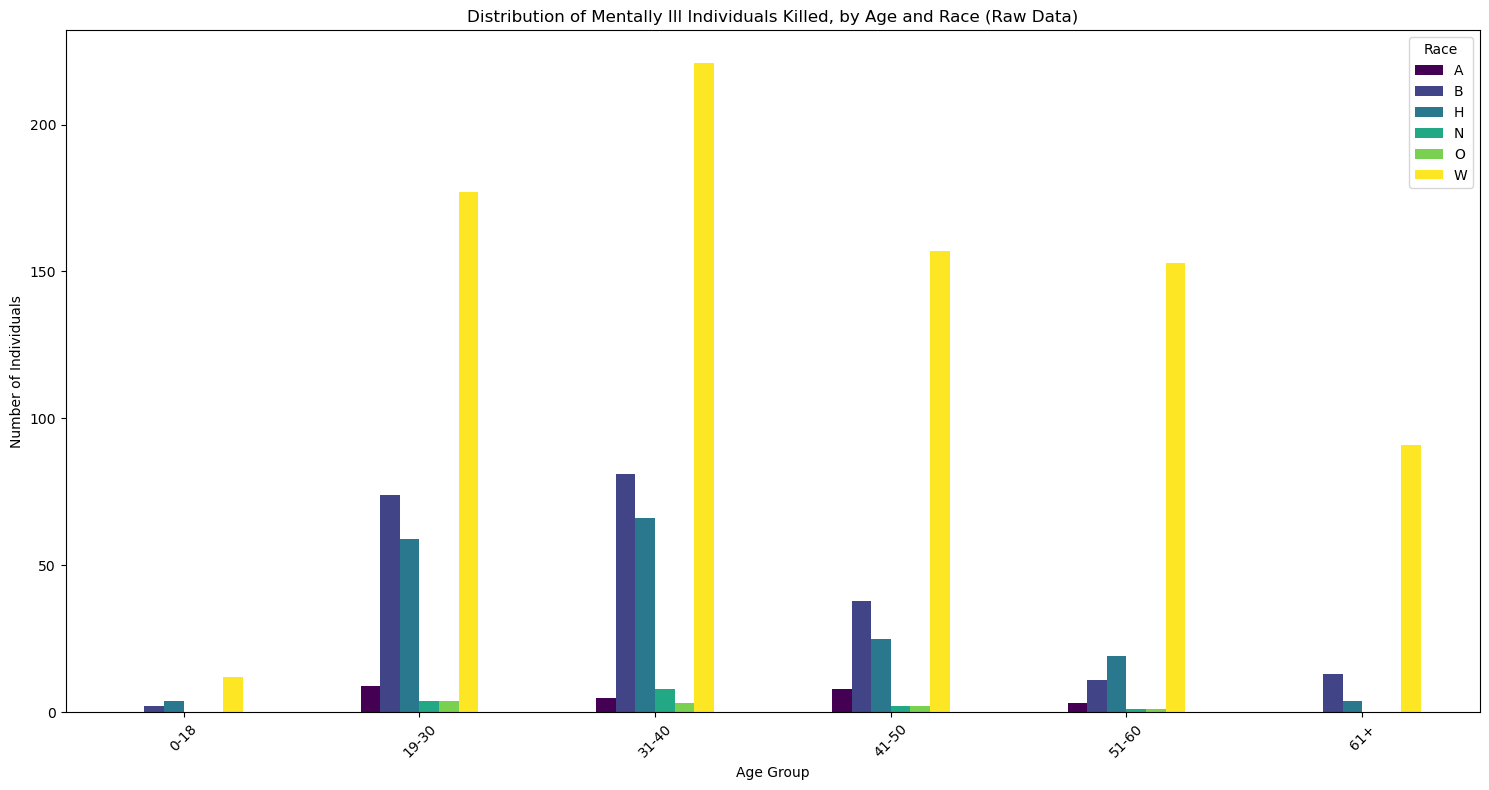

In [52]:
# Mentally Ill Victims Analysis (on Raw Data)
mentally_ill_df_raw = df_raw[df_raw['signs_of_mental_illness'] == True]

# Age and Race distribution
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
mentally_ill_df_raw['age_group'] = pd.cut(mentally_ill_df_raw['age'], bins=bins, labels=labels, right=False)
grouped_data_raw = mentally_ill_df_raw.groupby(['age_group', 'race']).size().unstack(fill_value=0)
print("Distribution of mentally ill individuals killed by age and race (from raw data):")
print(grouped_data_raw)

grouped_data_raw.plot(kind='bar', figsize=(15, 8), colormap='viridis')
plt.title('Distribution of Mentally Ill Individuals Killed, by Age and Race (Raw Data)')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.tight_layout()
plt.savefig('mentally_ill_age_race_distribution_raw.png')
plt.show()

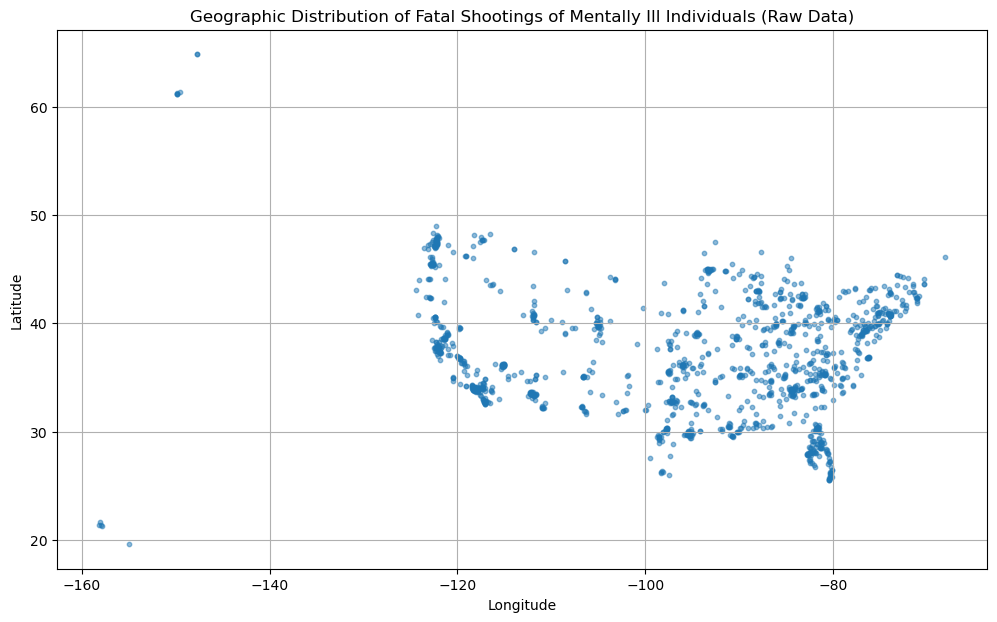

In [53]:
# Geographic distribution

mentally_ill_geo_df_raw = mentally_ill_df_raw.dropna(subset=['longitude', 'latitude'])
plt.figure(figsize=(12, 7))
plt.scatter(mentally_ill_geo_df_raw['longitude'], mentally_ill_geo_df_raw['latitude'], alpha=0.5, s=10)
plt.title('Geographic Distribution of Fatal Shootings of Mentally Ill Individuals (Raw Data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.savefig('mentally_ill_map_distribution_raw.png')
plt.show()

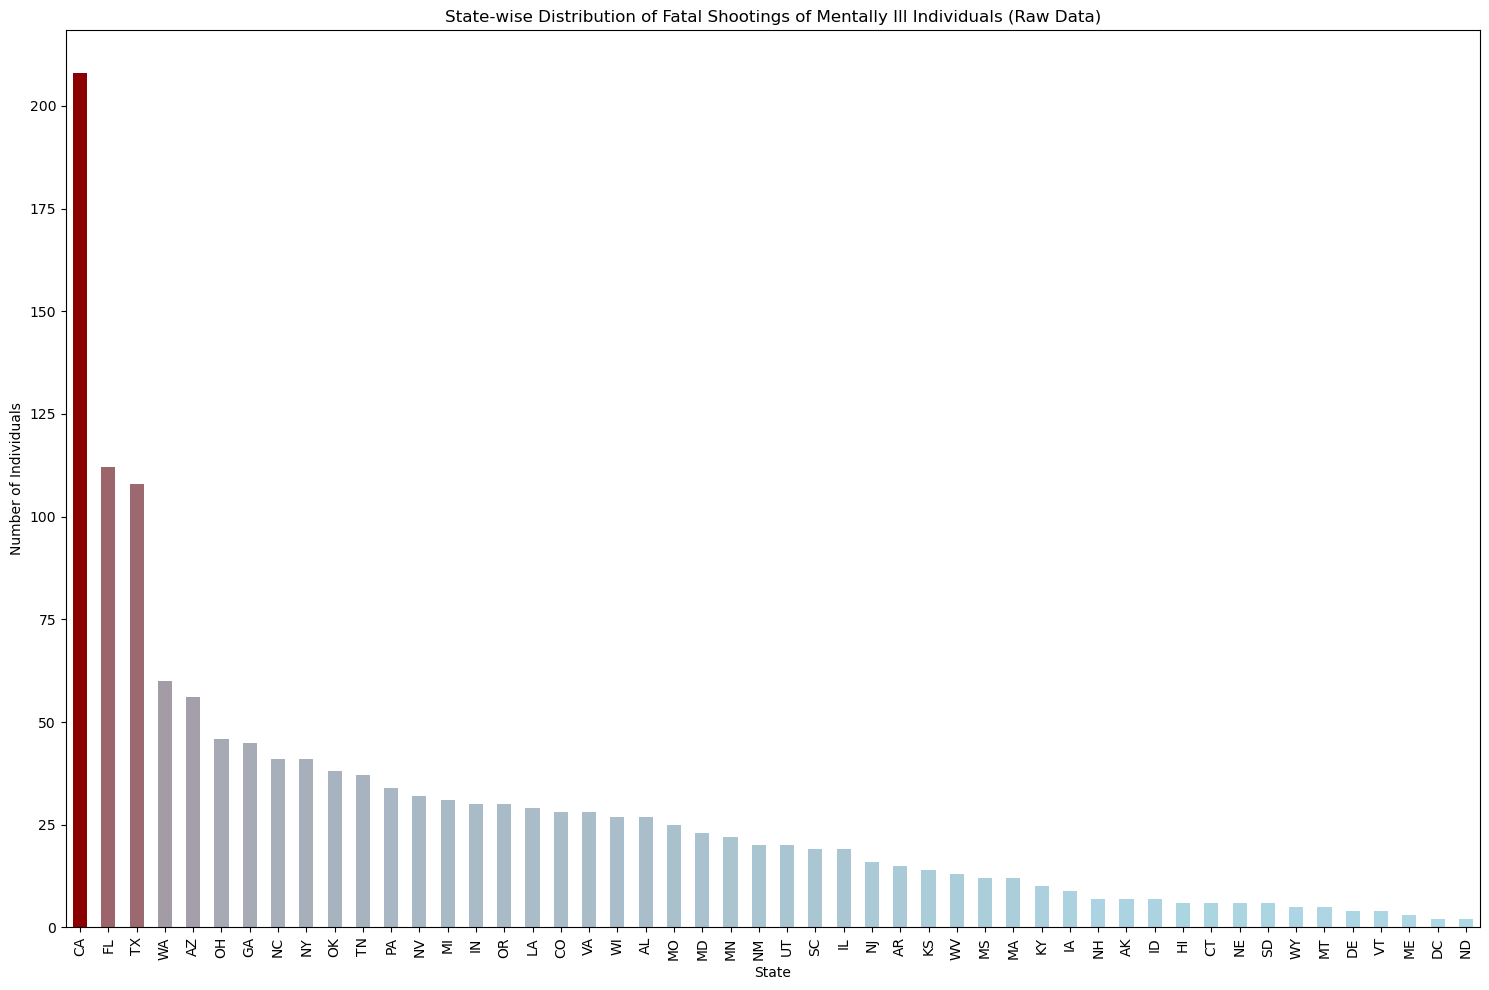

In [54]:
# State-wise color-coded bar chart

state_counts_mentally_ill_raw = mentally_ill_df_raw['state'].value_counts()
norm_raw = plt.Normalize(state_counts_mentally_ill_raw.min(), state_counts_mentally_ill_raw.max())
cmap_raw = LinearSegmentedColormap.from_list("custom_cmap", ["lightblue", "darkred"])
colors_raw = cmap_raw(norm_raw(state_counts_mentally_ill_raw.values))

plt.figure(figsize=(15, 10))
state_counts_mentally_ill_raw.sort_values(ascending=False).plot(kind='bar', color=colors_raw)
plt.title('State-wise Distribution of Fatal Shootings of Mentally Ill Individuals (Raw Data)')
plt.xlabel('State')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('mentally_ill_state_color_coded_bar_raw.png')
plt.show()